# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import date
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        print(i % 50 ==0)
        print(i>= 50)
        print( i, city)
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    #city_url = url + "&q=" + city + "appid=" + weather_api_key
    #f"{url}q={city}&appid={api_key}"
    weather_data= requests.get(city_url).json()
    print(weather_data)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
{'coord': {'lon': -73.65, 'lat': -37.6167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 285.57, 'feels_like': 285.3, 'temp_min': 285.57, 'temp_max': 285.57, 'pressure': 1021, 'humidity': 93, 'sea_level': 1021, 'grnd_level': 1017}, 'visibility': 10000, 'wind': {'speed': 1.97, 'deg': 142, 'gust': 2.15}, 'clouds': {'all': 100}, 'dt': 1683862942, 'sys': {'country': 'CL', 'sunrise': 1683805438, 'sunset': 1683842284}, 'timezone': -14400, 'id': 3883457, 'name': 'Lebu', 'cod': 200}
Processing Record 1 of Set 1 | lebu
{'coord': {'lon': 166.4372, 'lat': 68.0546}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 274.66, 'feels_like': 273.34, 'temp_min': 274.66, 'temp_max': 274.66, 'pressure': 1011, 'humidity': 96, 'sea_level': 1011, 'grnd_level': 976}, 'visibility': 460, 'wind': {

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,285.57,93,100,1.97,CL,1683862942
1,bilibino,68.0546,166.4372,274.66,96,100,1.36,RU,1683862826
2,ancud,-41.8697,-73.8203,285.33,98,100,2.94,CL,1683862943
3,port-aux-francais,-49.3500,70.2167,281.24,92,100,21.14,TF,1683862944
4,yellowknife,62.4560,-114.3525,288.44,38,75,2.06,CA,1683862944


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,285.57,93,100,1.97,CL,1683862942
1,bilibino,68.0546,166.4372,274.66,96,100,1.36,RU,1683862826
2,ancud,-41.8697,-73.8203,285.33,98,100,2.94,CL,1683862943
3,port-aux-francais,-49.3500,70.2167,281.24,92,100,21.14,TF,1683862944
4,yellowknife,62.4560,-114.3525,288.44,38,75,2.06,CA,1683862944


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

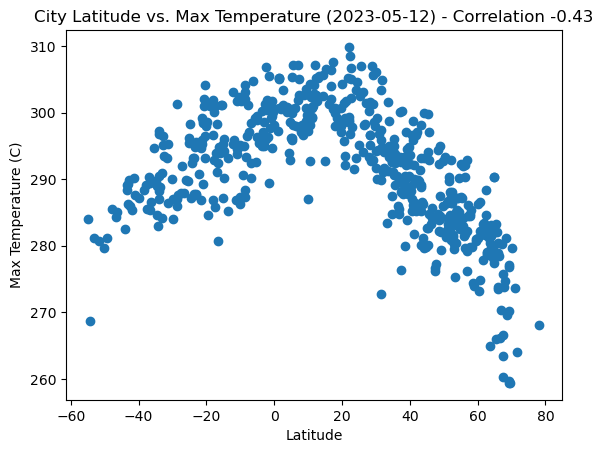

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

correlation = st.pearsonr(city_data_df["Lat"],city_data_df["Max Temp"])

plt.title(f"City Latitude vs. Max Temperature ({date.today()}) - Correlation {round(correlation[0],2)}")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

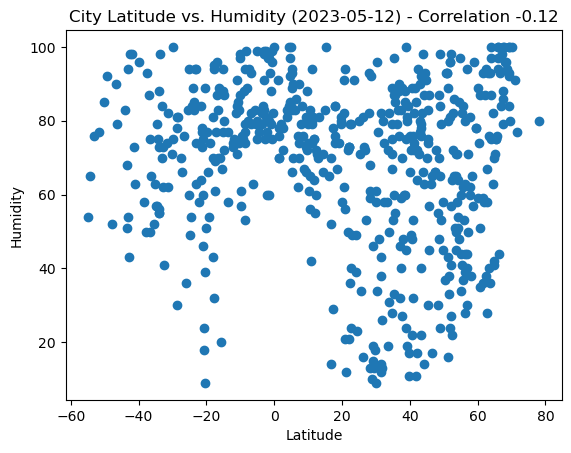

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity")

correlation = st.pearsonr(city_data_df["Lat"],city_data_df["Humidity"])

plt.title(f"City Latitude vs. Humidity ({date.today()}) - Correlation {round(correlation[0],2)}")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

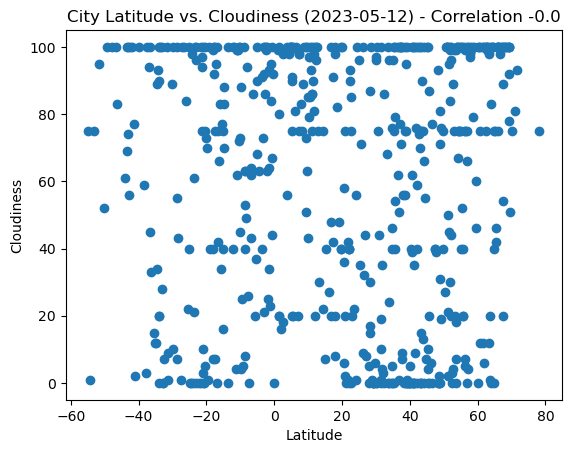

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

correlation = st.pearsonr(city_data_df["Lat"],city_data_df["Cloudiness"])

plt.title(f"City Latitude vs. Cloudiness ({date.today()}) - Correlation {round(correlation[0],2)}")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

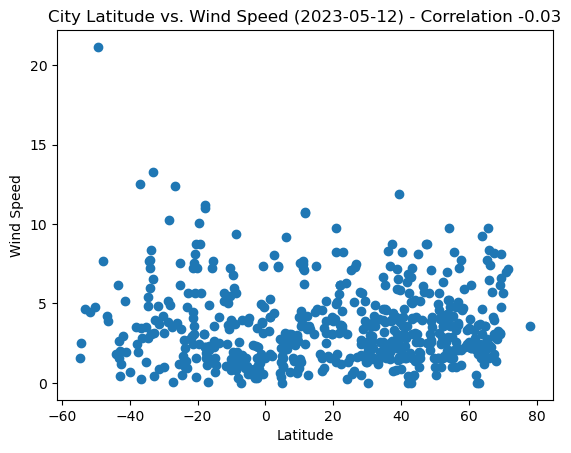

In [13]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

correlation = st.pearsonr(city_data_df["Lat"],city_data_df["Wind Speed"])

plt.title(f"City Latitude vs. Wind Speed ({date.today()}) - Correlation {round(correlation[0],2)}")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


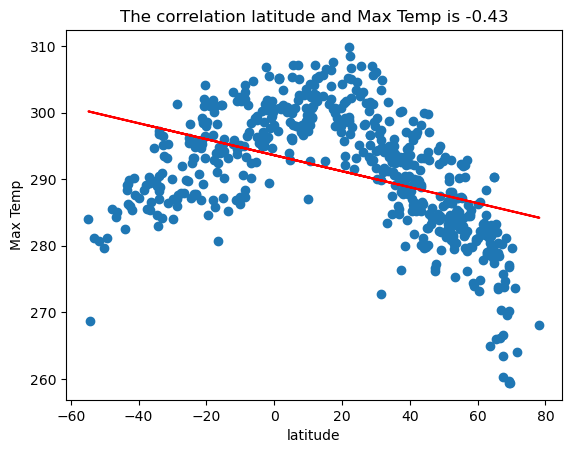

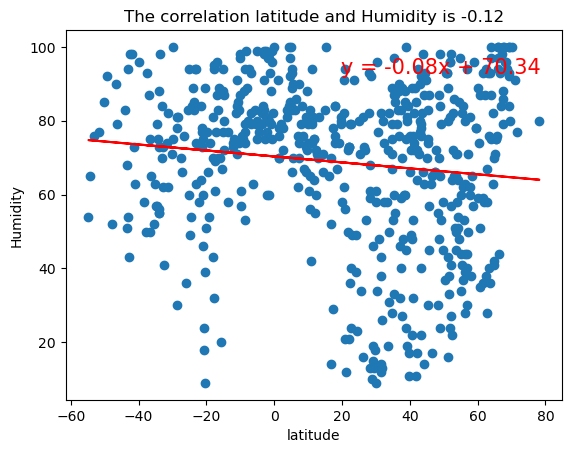

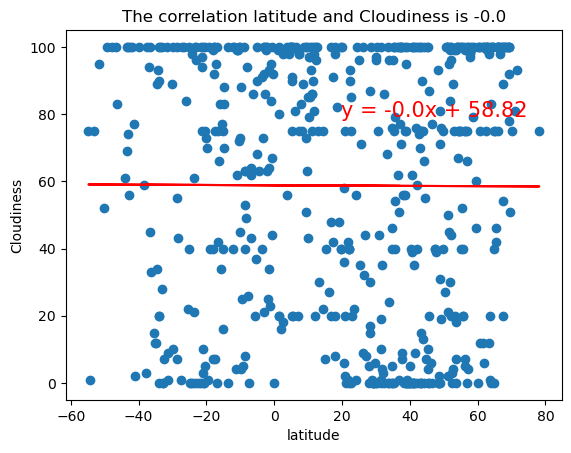

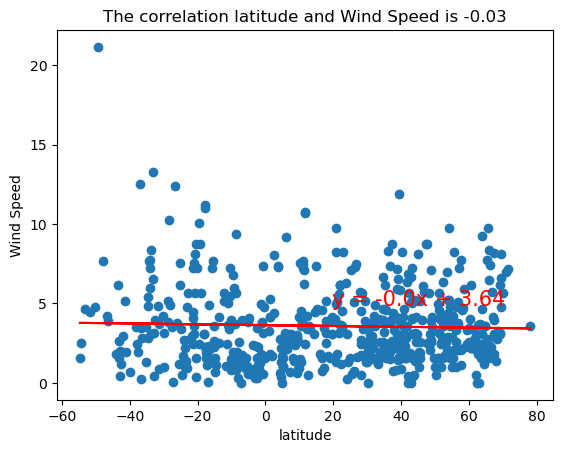

In [14]:
# Define a function to create Linear Regression plots
def  create_linear_regression_plot(x_values, y_values,x_label,y_label):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    
    
    x_ub = float(x_values.mean())
    y_ub =float(y_values.mean()*1.35)
    plt.annotate(line_eq,(x_ub,y_ub),fontsize=15,color="red")
    
    correlation = st.pearsonr(x_values,y_values)

    plt.title(f"The correlation {x_label} and {y_label} is {round(correlation[0],2)}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()




list_Property = ["Max Temp","Humidity","Cloudiness","Wind Speed"]

for property in list_Property:
    
    create_linear_regression_plot(city_data_df["Lat"],city_data_df[property],"latitude",property)

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,274.66,96,100,1.36,RU,1683862826
4,yellowknife,62.4560,-114.3525,288.44,38,75,2.06,CA,1683862944
7,lihue,21.9789,-159.3672,298.92,73,40,6.17,US,1683862946
10,sheldon,43.1811,-95.8561,293.21,79,0,7.20,US,1683862948
11,albany,42.6001,-73.9662,289.70,71,74,1.87,US,1683862732


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,285.57,93,100,1.97,CL,1683862942
2,ancud,-41.8697,-73.8203,285.33,98,100,2.94,CL,1683862943
3,port-aux-francais,-49.3500,70.2167,281.24,92,100,21.14,TF,1683862944
5,edinburgh of the seven seas,-37.0676,-12.3116,290.31,87,94,12.53,SH,1683862945
6,tshabong,-26.0500,22.4500,289.85,36,84,3.79,BW,1683862946


###  Temperature vs. Latitude Linear Regression Plot

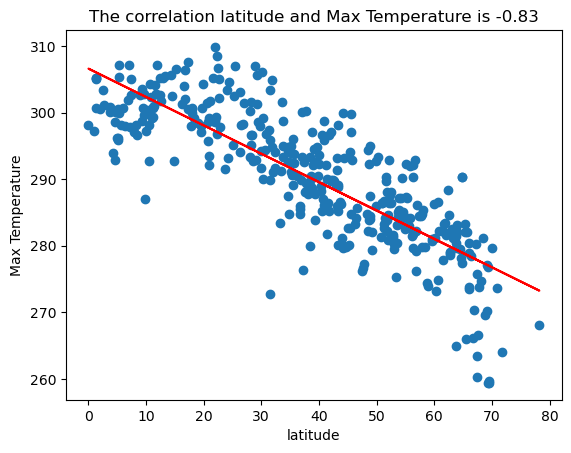

In [17]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"latitude","Max Temperature")

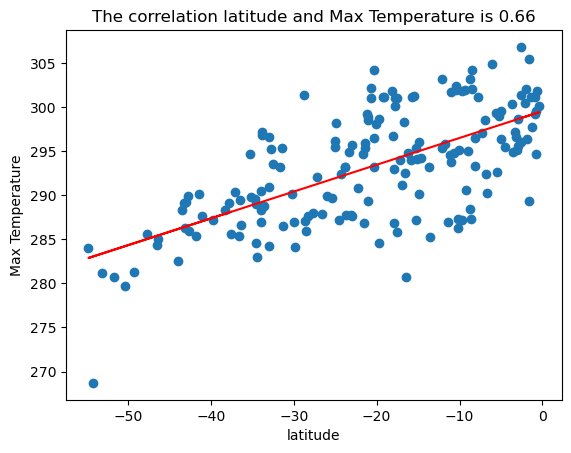

In [18]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"latitude","Max Temperature")

**Discussion about the linear relationship:** Considering The linear regression for latitud and temperature of most of 500 cities, we see a negative correlation for cities located in Northern Hemisphere. Having said that, we confirm that, for the cities in Northern Hemisphere, the less latitude, the less temperature. On the other hand, for cities in Southern Hemisphere, we confirm that, the more latitude, the temperature.

### Humidity vs. Latitude Linear Regression Plot

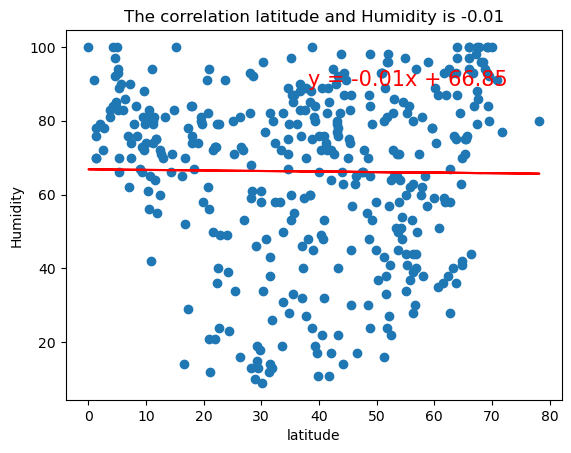

In [19]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"latitude","Humidity")

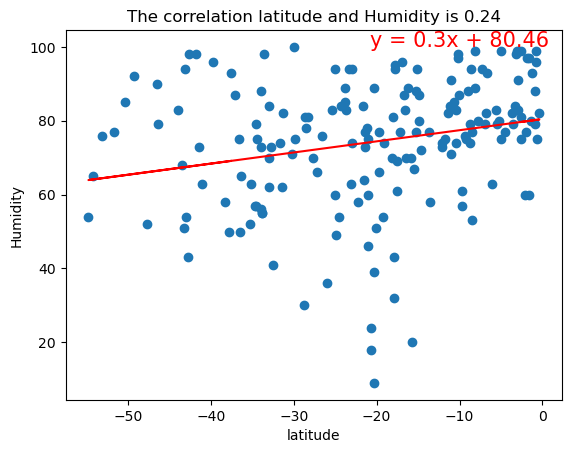

In [20]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"latitude","Humidity")

**Discussion about the linear relationship:** The linear regression considering latitud and humidity of most of 500 cities shows a positive correlation for cities located in Northern Hemisphere so as Southern Hemisphere. Having said that, we confirm that, for the cities in Northern and Southern Hemisphere, the more latitude, the more humidity.

### Cloudiness vs. Latitude Linear Regression Plot

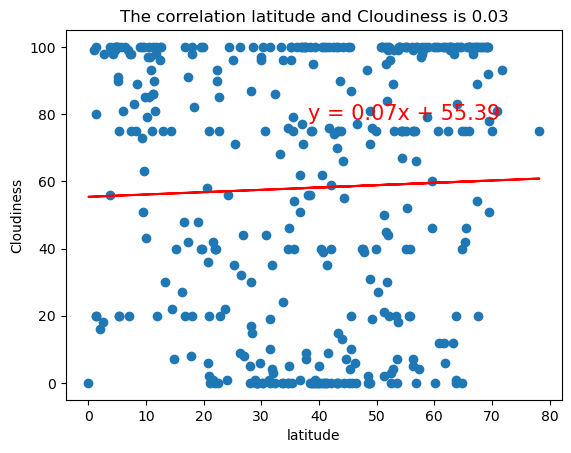

In [21]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"latitude","Cloudiness")

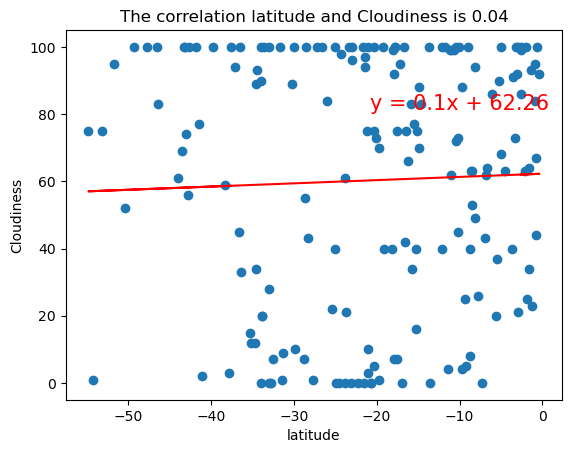

In [22]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"latitude","Cloudiness")

**Discussion about the linear relationship:** The linear regression considering latitud and Cloudiness of most of 500 cities shows a very positive correlation for cities located in Northern Hemisphere so as Southern Hemisphere. Having said that, we confirm that, for the cities in Northern and Southern Hemisphere, the more latitude, the more Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

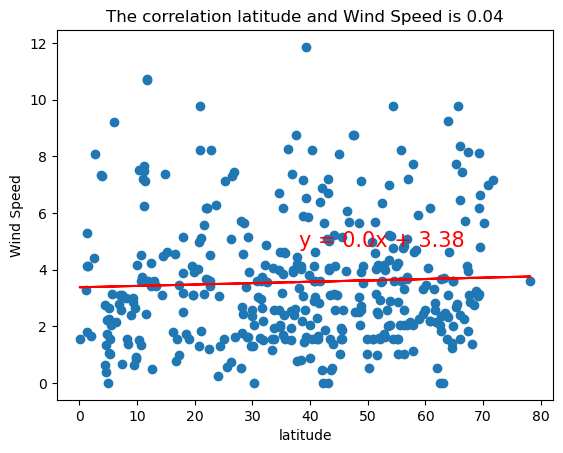

In [23]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"latitude","Wind Speed")

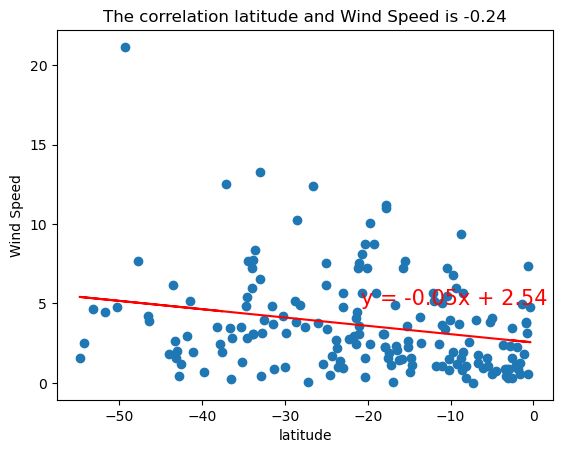

In [24]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"latitude","Wind Speed")

**Discussion about the linear relationship:** Cloudiness The linear regression considering latitud and Wind Speed of most of 500 cities shows that the wind Speed is steady all over the Northern Hemisphere; on the other hand, for the Southern Hemisphere, we can see that, the more latitude, the less Wind Speed.